## Binary Search on Answers


### Find square root of a number in log n
Consider the number n=25 the square root of 25 is 5

By linear search we can loop from 1 - n  
1x1=1 not equal to 25  
2x2=4 not equal to 25  
.  
.  
5x5=25 is equal to 25  
5 is the answer

In [3]:
# Using linear search
n = 25
ans = 1
for i in range(1, n+1):
    if i*i <= n:
        ans = i
    else:
        break
print(ans)
# Time complexity: O(n)
# Space complexity: O(1)

5


#### Using binary search  
Consider n = 28  
Our search space is from 1 to 28  
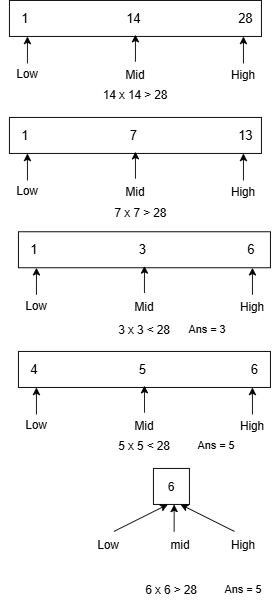

In [ ]:
# Using binary search
n = 35
ans = 1
low = 1
high = n
while low<=high:
    mid = int((low+high)/2)
    
    # Eliminate right
    if mid*mid > n:
        high = mid-1
    # Eliminate left
    elif mid*mid <= n:
        ans = mid
        low = mid+1

print(ans)
# Time complexity: O(log n)
# Space complexiy: O(1)

5


### Find nth root of a number
Consider n=3 and number m=27 and 3rd root of 27 is 3  
Consider n=4 and number m=69 and 4th root of 69 doesn't exist since 4th root of 16 is 2 and 4th root 81 is 3. So the answer is -1

In [ ]:
# Using linear search
def root(i,n):
    """For mutliplying"""
    a = 1
    for j in range(1,n+1):
        a = a*i
    return a

def searchroot(m,n):
    """Finding root"""
    for i in range(1,m+1):
        if root(i,n) == m:
            return i
        elif root(i,n) > m:
            break
    return -1

print(searchroot(16,4))
# Time complexity: O(m*n)
# Space complexity: O(1)

2


In [ ]:
# Using Binary search
def binaryroot(m,n):
    low = 1
    high = m
    
    while low<=high:
        mid = int((low+high)/2)
        if root(mid,n) == m:
            return mid
        # search in left
        if root(mid,n) > m:
            high = mid-1
        # search in right
        else:
            low = mid+1
    return -1

print(binaryroot(64,2))
# Time

8


### Koko eating bananas
Consider banana piles where each pile has certain number of bananas  
piles[] = [3,6,7,11]  
Koko is a person who has h=8 hours and in that koko has to eat all banana's in fastest possible manner  
Return the min integer k-(number of bananas eating per hour) such that koko can eat all banana's within h hours

Consider the piles[] = [3,6,7,11], let k=2 banana's per hour  
First pile - 3 banana's - takes 2 hours to eat (always take ceil)  
next pile - 6 banana's - takes 3 hours  
next pile - 7 banana's - takes 4 hours  
next pile - 11 banana's - takes 6 hours  
Total time is 15 hours  

Lets take 3 banana's per hour and repeat it again  
3 - 1 hour, 6 - 2 hours, 7 - 3 hours, 11 - 4 hours -> 10 hours  

Lets take 4 banana's per hour and repeat it again  
3 - 1 hour, 6 - 2 hours, 7 - 2 hours, 11 - 3 hours -> 8 hours

Start with 1 banana per hour and with each failure increase 1 banana and stop at a point of success  
Maximum will be max of piles array

In [ ]:
# Brute force: increase count per hour
import math
def requireTime(arr,p):
    """To calculate the total time"""
    time = 0
    for i in arr:
        time += math.ceil(i/p)
    return time

piles = [3,6,7,11]
h = 8
for i in range(1,max(piles)+1):
    t = requireTime(piles,i)
    if t <= h:
        print(i)
        break

# Time complexity: O(max(n) x n)
# Space complexity: O(1)


6
4


Now our range is 1 to max(arr), here our range is 1 -> 11, so we can apply binary search to get minimum.  

In [9]:
# Using binary search
def perhour(arr,h):
    low = 1
    high = max(arr)
    ans = max(arr)
    while low<=high:
        mid = int((low+high)/2)
        # Check on left
        if requireTime(arr,mid) <= h:
            ans = mid
            high = mid-1
        # Check on right
        else:
            low = mid+1
    return ans
piles = [30,11,23,4,20]
print(perhour(piles,5))

# Time complexity: O(n * log max(arr))
# Space complexity: O(1)
    

30
